In [ ]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [ ]:
import sqlite3
import requests
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
# Real-Time Weather Data Extraction using Open-Meteo API
# This section retrieves hourly temperature and humidity data for Berlin using Open-Meteo API

# Define API endpoint and query parameters
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 52.52,     # Berlin latitude
    "longitude": 13.41,    # Berlin longitude
    "hourly": "temperature_2m,relative_humidity_2m",  # hourly parameters to retrieve
    "start": "2025-06-11T00:00",                      # start of the forecast period
    "end": "2025-06-12T00:00",                        # end of the forecast period
    "timezone": "Europe/Berlin"                       # timezone of the data
}

# Send GET request to the API
response = requests.get(url, params=params)
data = response.json()

# Convert JSON response to Pandas DataFrame
df = pd.DataFrame({
    "time": data["hourly"]["time"],
    "temperature": data["hourly"]["temperature_2m"],
    "humidity": data["hourly"]["relative_humidity_2m"]
})

# Convert time column to datetime format
df["time"] = pd.to_datetime(df["time"])

# Quick look at the dataset
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)
print(df.head())


Shape: (168, 3)
Columns: ['time', 'temperature', 'humidity']
Missing values:
 time           0
temperature    0
humidity       0
dtype: int64
Data types:
 time           datetime64[ns]
temperature           float64
humidity                int64
dtype: object
                 time  temperature  humidity
0 2025-06-11 00:00:00         14.9        83
1 2025-06-11 01:00:00         14.6        82
2 2025-06-11 02:00:00         14.1        82
3 2025-06-11 03:00:00         13.8        80
4 2025-06-11 04:00:00         13.1        77


In [30]:
# This section sets the 'time' column as index and resamples the data to 3-hour intervals

# Set 'time' as the index for resampling
df.set_index("time", inplace=True)

# Compute 3-hour average for temperature and humidity
df_resampled = df.resample("3H").mean().reset_index()

# Display the first five rows of the resampled data
print(df_resampled.head())


                 time  temperature   humidity
0 2025-06-11 00:00:00    14.533333  82.333333
1 2025-06-11 03:00:00    13.233333  78.333333
2 2025-06-11 06:00:00    12.966667  78.666667
3 2025-06-11 09:00:00    14.900000  65.666667
4 2025-06-11 12:00:00    17.233333  53.333333


C:\Users\esing\AppData\Local\Temp\ipykernel_24204\3023816758.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("3H").mean().reset_index()


In [31]:
# This section writes the 3-hour average weather data to a local SQLite database

# Establish a connection to the SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect("weather_data.db")

# Write the DataFrame to a new table called 'weather_summary'
df_resampled.to_sql("weather_summary", conn, if_exists="replace", index=False)

# Close the connection
conn.close()

print("Resampled data successfully saved to SQLite database.")


Resampled data successfully saved to SQLite database.


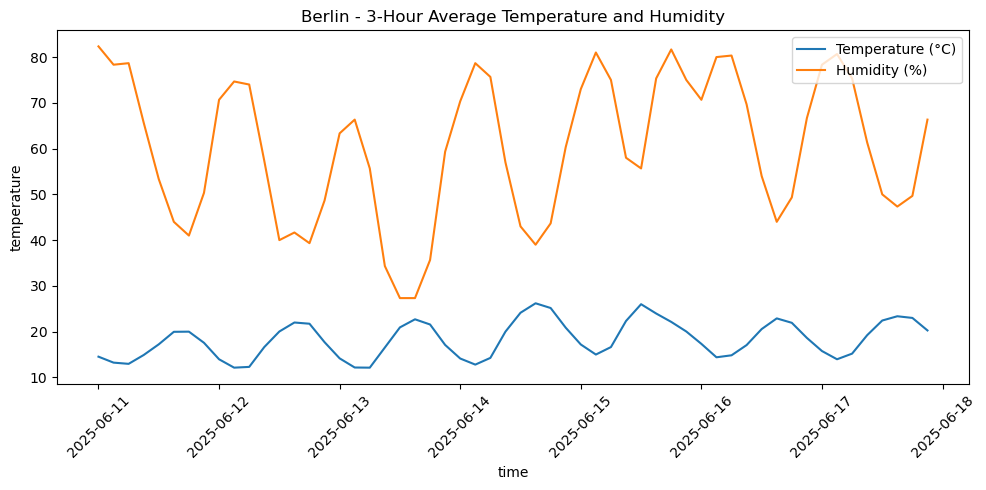

In [35]:
# This section visualizes temperature and humidity trends over time using Seaborn

# Create the figure and define its size
plt.figure(figsize=(10, 5))

# Plot temperature over time
sns.lineplot(data=df_resampled, x="time", y="temperature", label="Temperature (°C)")

# Plot humidity over time
sns.lineplot(data=df_resampled, x="time", y="humidity", label="Humidity (%)")

plt.title("Berlin - 3-Hour Average Temperature and Humidity")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("weather_plot.png", dpi=300)
plt.show()



In [ ]:
# This section mimics streaming behavior by printing one row at a time

import time

def simulate_streaming(df, delay=1):
    """
    Simulates real-time data streaming by printing one row at a time with a delay.

    Parameters:
        df (DataFrame): The DataFrame to stream from.
        delay (int): Delay in seconds between each data point.
    """
    print("Simulated Streaming Output:")
    for _, row in df.iterrows():
        print(row.to_dict())
        time.sleep(delay)

# Run streaming simulation on first 8 rows
simulate_streaming(df_resampled.head(8), delay=1)

🌐 Streaming verisi:
{'time': Timestamp('2025-06-11 00:00:00'), 'temperature': 14.533333333333333, 'humidity': 82.33333333333333}
{'time': Timestamp('2025-06-11 03:00:00'), 'temperature': 13.233333333333334, 'humidity': 78.33333333333333}
{'time': Timestamp('2025-06-11 06:00:00'), 'temperature': 12.966666666666667, 'humidity': 78.66666666666667}
{'time': Timestamp('2025-06-11 09:00:00'), 'temperature': 15.033333333333333, 'humidity': 64.33333333333333}
{'time': Timestamp('2025-06-11 12:00:00'), 'temperature': 17.866666666666664, 'humidity': 50.333333333333336}
{'time': Timestamp('2025-06-11 15:00:00'), 'temperature': 19.900000000000002, 'humidity': 42.0}
{'time': Timestamp('2025-06-11 18:00:00'), 'temperature': 20.2, 'humidity': 36.666666666666664}
{'time': Timestamp('2025-06-11 21:00:00'), 'temperature': 17.533333333333335, 'humidity': 53.0}
